# 

In [26]:
from Scripts.Make_logistic import *
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [27]:
df = pd.read_excel('Data/Clinical_synthetic.xlsx', index_col=0)
#df=df.dropna()
X,y=df.drop(['constrution_year', 'Area', 'floor_level', 'powerplant',
       'road', 'motorway', 'forest', 'coastline', 'airport', 'farmland',
       'industrial', 'carpet', 'cookerhood', 'passive', 'gastove', 'fireplace',
       'corrected_week','scale_formaldehyd', 'scale_acetald', 'scale_vocs',"scaled_vocs",'bmi_6_yrs', 'mother\'s_education_1yr',
       'PCA1', 'PCA2','asthma_0_7yrs', 'verificeret_18y', 'verificeret_12y', 'crp_6mo', 'il_1β_6mo', 'il_8_6mo', 'il_6_6mo',
       'tnf_α_6mo', 'urti_1y', 'rti_1y', 'fever_1y', 'gi_1y',
       'any_1y', 'lrti_3yr', 'urti_3yr', 'rti_3yr', 'fever_3yr', 'gi_3yr',
       'any_3yr'],axis=1),df.verificeret_12y

In [28]:
X.index.values

array([  1,   3,   5,   7,   8,  10,  11,  12,  13,  14,  15,  18,  21,
        22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
        35,  36,  38,  39,  40,  42,  43,  44,  48,  49,  50,  51,  52,
        54,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  71,  72,  73,  74,  76,  77,  78,  79,  80,  81,  84,
        85,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 113, 114,
       115, 116, 117, 118, 119, 121, 123, 124, 125, 126, 127, 128, 129,
       130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 145,
       146, 147, 148, 149, 151, 152, 153, 154, 155, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 175,
       176, 177, 178, 179, 181, 182, 183, 184, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 202, 203, 205,
       206, 207, 208, 209, 210, 211, 212, 214, 215, 216, 217, 21

In [29]:
X.isna().sum()

scaled_nox                   0
scaled_no2                   0
scaled_formaldehyd           0
scaled_acetone               0
scaled_acetald               0
scaled_bc                    0
scaled_PM25                  0
no2_regional                 0
nox_regional                 0
pm25_regional                0
no2_street                   0
nox_street                   0
pm25_street                  0
gestational_age              0
lrti_1y                      0
genetic_risk_score_asthma    0
dtype: int64

In [30]:
performence,kernel,mcmc=nested_cross_baysian_logistic(X,y,2,3,"Models/asthma_12_year_")

Sample: 100%|████████████████████████████████████████| 8000/8000 [04:36, 28.95it/s, step size=1.34e-01, acc. prob=0.930]
/data/michaelf/miniconda3/lib/python3.10/site-packages/arviz/data/io_pyro.py:158: UserWarning: Could not get vectorized trace, log_likelihood group will be omitted. Check your model vectorization or set log_likelihood=False
  warnings.warn(
posterior predictive shape not compatible with number of chains and draws.This can mean that some draws or even whole chains are not represented.
Sample: 100%|████████████████████████████████████████| 8000/8000 [04:43, 28.18it/s, step size=1.33e-01, acc. prob=0.926]
/data/michaelf/miniconda3/lib/python3.10/site-packages/arviz/data/io_pyro.py:158: UserWarning: Could not get vectorized trace, log_likelihood group will be omitted. Check your model vectorization or set log_likelihood=False
  warnings.warn(
posterior predictive shape not compatible with number of chains and draws.This can mean that some draws or even whole chains are n

In [37]:
performence.mean(axis=0),performence.std(axis=0)
performence.to_excel("Models/performence_12.xlsx")


In [38]:
asthma_1_exposure=az.from_json("Models/asthma_12_year_00.json")
asthma_2_exposure=az.from_json("Models/asthma_12_year_01.json")
asthma_3_exposure=az.from_json("Models/asthma_12_year_10.json")
asthma_4_exposure=az.from_json("Models/asthma_12_year_11.json")
asthma_5_exposure=az.from_json("Models/asthma_12_year_20.json")
asthma_6_exposure=az.from_json("Models/asthma_12_year_21.json")
asthma=az.concat(asthma_1_exposure,asthma_2_exposure,asthma_3_exposure,asthma_4_exposure,asthma_5_exposure,asthma_6_exposure, dim="chain")

In [39]:
performence

,roc_train,roc_test,f1_train,f1_test
0,0.732284,0.650071,0.143791,0.213333
1,0.753632,0.656136,0.280255,0.255319
2,0.753684,0.607656,0.192771,0.220183
3,0.754196,0.649834,0.211111,0.256410
4,0.724815,0.656591,0.171779,0.195122
5,0.750551,0.616029,0.269841,0.240000


In [40]:
asthma["posterior"]["weight"]=np.exp(asthma["posterior"]["weight"])
asthma.posterior = asthma.posterior.assign_coords(
    weight_dim_0=X.columns
)
asthma.to_netcdf("Models/asthma_12y.nc")

'Models/asthma_12y.nc'

In [41]:
az.summary(asthma)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bias[0],-2.190,0.234,-2.618,-1.745,0.008,0.001,783.0,17236.0,1.01
weight[scaled_nox],0.838,0.228,0.420,1.263,0.035,0.010,40.0,102.0,1.09
weight[scaled_no2],1.339,0.412,0.672,2.123,0.107,0.053,15.0,51.0,1.30
weight[scaled_formaldehyd],0.607,0.242,0.205,1.048,0.069,0.019,12.0,54.0,1.43
weight[scaled_acetone],0.732,0.279,0.264,1.243,0.063,0.026,19.0,71.0,1.22
weight[scaled_acetald],1.052,0.417,0.316,1.778,0.110,0.034,13.0,55.0,1.36
weight[scaled_bc],1.139,0.282,0.619,1.654,0.022,0.002,161.0,1536.0,1.03
weight[scaled_PM25],0.689,0.219,0.284,1.085,0.033,0.001,40.0,152.0,1.09
weight[no2_regional],1.189,0.953,0.132,2.817,0.051,0.016,213.0,12291.0,1.02
weight[nox_regional],1.958,1.443,0.245,4.462,0.036,0.020,701.0,15104.0,1.01


array([<Axes: title={'center': '1.0% HDI'}>], dtype=object)

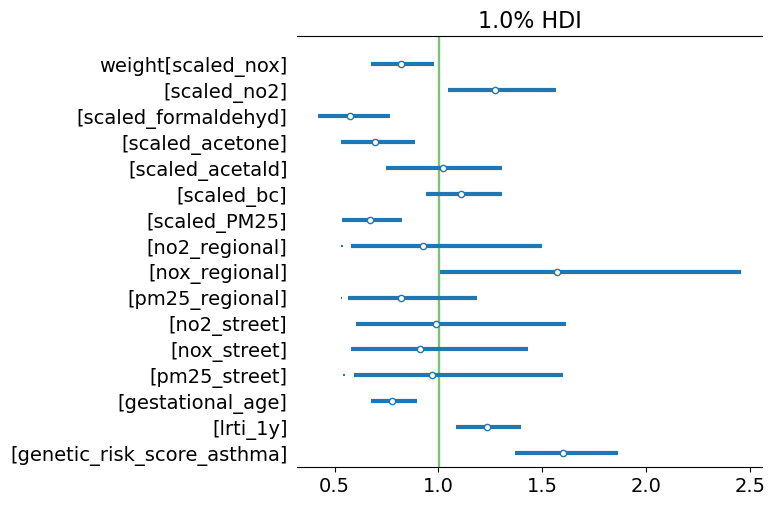

In [43]:
az.plot_forest(
    [asthma],filter_vars="regex", hdi_prob=0.01,quartiles=True,combined=True,ridgeplot_quantiles=[0.05,0.95], var_names="^weight",rope=[0.999,1.001])